In [3]:
import pandas as pd

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sindhu
[nltk_data]     Khrisna\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

# Load data

In [84]:
df = pd.read_csv("C:/Bangkit/ML/Datasets/Names/combine.csv", encoding='cp1252')
# df = pd.read_csv("name_gender.csv")

In [85]:
df.head()

,name,gender
0,hafizhan shidqi,m
1,gandhi wibowo,m
2,aldio mahendra purwandrarto,m
3,benny putra,m
4,vicky vernando dasta,m


# Encoding dengan menggunakan fast text

In [86]:
import os
from tqdm.auto import tqdm

from nltk.tokenize import word_tokenize
from gensim.models import FastText

In [87]:
# tokenisasi nama
sentences = [word_tokenize(text.lower()) for text in tqdm (df.name)]
sentences[:5]

100%|██████████| 7327/7327 [00:00<00:00, 26132.06it/s]


[['hafizhan', 'shidqi'],
 ['gandhi', 'wibowo'],
 ['aldio', 'mahendra', 'purwandrarto'],
 ['benny', 'putra'],
 ['vicky', 'vernando', 'dasta']]

# Train2Vec

In [88]:
# ukuran size = latent space = 16, 32, dll . Di industry size 100, sedang = 200, wikipedia =300
# window lihat ke kiri atau kekanan seberapa banyak
# min_count = berapa banyak kata yang muncul agar dijadikan word yang ditraining
#sg = skip gram , by default dia false
model = FastText(sentences, vector_size = 128, window = 5, min_count =3 , workers = 4, epochs=1000, sg=0, hs = 0)

In [89]:
os.makedirs("model/fasttext/", exist_ok= True)
model.save("model/fasttext/name_gender.fasttext")

# Model information

In [90]:
w2v = model.wv

In [91]:
w2v.index_to_key

['dwi',
 'siti',
 'muhammad',
 'nur',
 'putri',
 'sari',
 'ahmad',
 'dewi',
 'tri',
 'saputra',
 'sri',
 'putra',
 'muhamad',
 'eka',
 'ayu',
 'agus',
 'm',
 'maulana',
 'lestari',
 'indah',
 'pratama',
 'kurniawan',
 'setiawan',
 's',
 'hidayat',
 'abdul',
 'adi',
 'fitri',
 'ningsih',
 'rizki',
 'wulandari',
 'al',
 'aulia',
 'wijaya',
 'rahayu',
 'susanto',
 'wati',
 'nurul',
 'a',
 'ilham',
 'wahyu',
 'eko',
 'agung',
 "'",
 'dian',
 'rahman',
 'susanti',
 'arif',
 'ade',
 'indra',
 'desi',
 'yuli',
 'safitri',
 'fajar',
 'ramadhan',
 'ali',
 'akbar',
 'rahmat',
 'puspita',
 'fitria',
 'aditya',
 'mohamad',
 'bagus',
 'yanti',
 'fauzi',
 'astuti',
 'gunawan',
 'andika',
 'pratiwi',
 'rini',
 'budi',
 'hadi',
 'imam',
 'ratna',
 'rizky',
 'ari',
 'darmawan',
 'teguh',
 'agustina',
 'novita',
 'andi',
 'chandra',
 'suryani',
 'aprilia',
 'anggraini',
 'efendi',
 'ridho',
 'fajri',
 'maria',
 'dedi',
 'hasanah',
 'abdullah',
 'utami',
 'candra',
 'wahyudi',
 'irawan',
 'kevin',
 'anan

# Klasifikasi

In [92]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.utils import save_model, load_model

In [93]:
from nltk.tokenize import word_tokenize
from gensim.models import FastText

In [94]:
w2v = FastText.load("model/fasttext/name_gender.fasttext").wv

In [95]:
def norm_sent_vector(sentence, w2v_model):
    vecs = [w2v_model[word.lower()] for word in word_tokenize (sentence)]    
    norm_vecs = [vec/ np.linalg.norm(vec) for vec in vecs if np.linalg.norm(vec > 0)]
    sent_vec = np.mean (vecs, axis = 0) #dari arah baris
    return sent_vec

# Dataset splitting

In [96]:
vecs = [norm_sent_vector (sentence, w2v) for sentence in df.name]
vecs = np.array(vecs)
vecs

array([[-0.12686518, -0.18027356,  0.03136892, ..., -0.0968634 ,
         0.1724319 , -0.24226503],
       [-0.12285295,  0.08681968, -0.19128844, ..., -0.10297866,
        -0.4062792 , -0.39089125],
       [-0.04228776, -0.63308555, -0.34728995, ..., -0.04849106,
         0.26998463, -0.1413591 ],
       ...,
       [-0.88614064, -0.30996597, -0.30570903, ...,  0.59605944,
        -0.23715955, -0.55560607],
       [-0.08158301,  0.68915987, -0.2306877 , ..., -0.8947892 ,
         0.31314147,  0.05798381],
       [-0.1016117 ,  0.20037715, -0.2055416 , ...,  0.31825373,
        -0.18192257, -0.02579423]], dtype=float32)

Contoh representasi nama --> vector 128

In [97]:
df.name[0], vecs[0]

('hafizhan shidqi',
 array([-1.26865178e-01, -1.80273563e-01,  3.13689187e-02,  4.43728082e-02,
        -4.68263403e-04, -3.20807323e-02,  3.07437107e-02, -1.88596006e-02,
         8.35643262e-02, -1.09985337e-01,  1.34102851e-01, -2.42300123e-01,
        -1.18855938e-01, -1.35793865e-01,  2.18001172e-01,  6.65833652e-02,
         2.13371545e-01, -1.27533242e-01, -4.47154194e-02, -1.51208341e-01,
        -2.14681439e-02,  4.41365182e-01, -1.21428154e-01,  2.70673633e-01,
        -1.33938804e-01,  9.59883481e-02, -2.52282530e-01,  3.15722942e-01,
         1.66536242e-01, -8.29369351e-02, -3.07236612e-03, -1.51879504e-01,
        -1.48971573e-01,  2.89783478e-01, -4.01438326e-02, -6.49504140e-02,
         7.76674747e-02,  6.56381547e-02, -2.50416566e-02, -8.10808465e-02,
        -5.58950081e-02,  3.34556580e-01,  9.83634368e-02, -7.05837607e-02,
        -6.31024688e-03,  1.58711940e-01, -1.93333104e-02, -1.62147045e-01,
        -3.55939269e-02, -2.00221077e-01, -2.26488829e-01, -2.108243

In [98]:
X = vecs
y = df.gender

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5861, 128), (1466, 128), (5861,), (1466,))

# Training

In [99]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [100]:
pipeline = Pipeline([
    ('algo', SVC(max_iter=500))
])


model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=4, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits


c:\Bangkit\ML\sindhu-env\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 0.0052187377767381965, 'algo__gamma': 19.03131174508696}
0.8510493089916397 0.7807538564690435 0.7824010914051842


# Evaluation

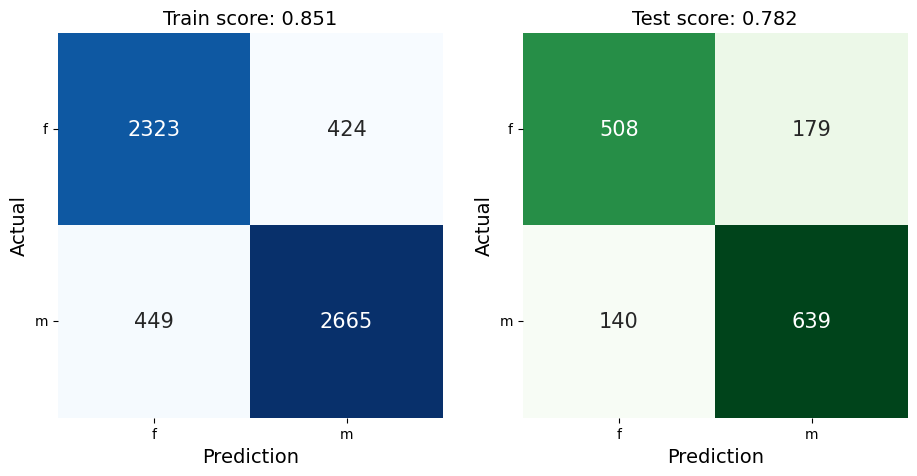

In [101]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

# Save model & use model to predict new data

In [102]:
save_model(model,'name_to_gender1.pkl')

Model is pickled as model/name_to_gender1.pkl


# Import model

In [115]:
model = load_model('model/name_to_gender1.pkl')

In [125]:
name = ["riski wijaya"]

vecs_name = [norm_sent_vector (sentence.lower(), w2v) for sentence in name]
vecs_name = np.array(vecs_name)
model.predict(vecs_name)

array(['f'], dtype=object)